Entries Analysis
---

Author: Peter Zhang

Analysis of tournament entries.

### Setup

#### Imports

In [475]:
# imports
import urllib.request, urllib.parse, urllib.error
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import csv
import os.path
from os import path
import sys
from string import ascii_lowercase
import math
import mpu
import numpy as np
from matplotlib import pyplot as plt

#### Settings

In [365]:
ENTRIES_CSV = 'tab_data/edebate_entries.csv'

In [366]:
with open(ENTRIES_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    entries = [row for row in inReader]

In [208]:
LOCATION_CSV = 'tools/locations.csv'

In [209]:
location = {}
with open(LOCATION_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    for row in inReader:
        location[row['State']] = (float(row['Lattitude']), float(row['Longitude']))

In [203]:
states = location.keys()

In [363]:
INFO_CSV = 'tab_data/edebate_info.csv'

In [364]:
tournInfo = {}
with open(INFO_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    for row in inReader:
        tournInfo[row["Tourn Name"]] = row

In [159]:
OUTFILE = 'results/edebate_analysis.csv'

In [265]:
OUTFILE2 = 'results/edebate_summary.csv'

In [212]:
ABBREV_CSV = 'tools/abbrev.csv'

In [213]:
abbrevOf = {}
with open(ABBREV_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    for row in inReader:
        abbrevOf[row['Name']] = row['Abbrev']

In [224]:
ACT_CSV = 'tools/actscores.csv'

In [239]:
acts = {}
with open(ACT_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    for row in inReader:
        state = row['State']
        if state in abbrevOf:
            acts[abbrevOf[state]] = float(row['Score'])

In [387]:
INCOME_CSV = 'tools/income.csv'

In [388]:
incomes = {}
with open(INCOME_CSV) as inFile:
    inReader = csv.DictReader(inFile)
    for row in inReader:
        state = row['State']
        if state in abbrevOf:
            income = row['Income'].replace(',', '')
            incomes[abbrevOf[state]] = int(income)

### Analysis

#### Helpers

In [515]:
def getData(entries19, entries20, host):
    # count entries
    numEntries19 = len(entries19)
    numEntries20 = len(entries20)
    # get states
    states19 = set([getAbbrev(entry["State"]) for entry in entries19])
    states20 = set([getAbbrev(entry["State"]) for entry in entries20])
    # remove empty/unformatted states
    states19 = [state for state in states19 if state in states]
    states20 = [state for state in states20 if state in states]
    # find num of orig
    original = len([entry for entry in entries20 if getAbbrev(entry["State"]) in states19])
    avgDist19 = avgDist(entries19, host)
    avgDist20 = avgDist(entries20, host)
    avgACT19 = avgACT(entries19)
    avgACT20 = avgACT(entries20)
    avgIncome19 = avgIncome(entries19)
    avgIncome20 = avgIncome(entries20)
    return [numEntries19,
            numEntries20,
           len(states19),
           len(states20),
           original, 
           avgDist19,
           avgDist20,
            avgACT19,
            avgACT20,
            avgIncome19,
            avgIncome20]

In [248]:
def avgACT(entries):
    scores = [acts[getAbbrev(entry['State'])] for entry in entries if getAbbrev(entry['State']) in states]
    return sum(scores)/len(scores)

In [251]:
def avgIncome(entries):
    households = [incomes[getAbbrev(entry['State'])] for entry in entries if getAbbrev(entry['State']) in states]
    return sum(households)/len(households)

In [274]:
# computes distance between two sets of coords
def distance(coords1, coords2):
    return mpu.haversine_distance(coords1, coords2)

In [262]:
# computes average distance of entries from host state
def avgDist(entries, host):
    hostCoords = location[host]
    totalDist = 0
    for entry in entries:
        state = entry["State"]
        abbrev = getAbbrev(state)
        if abbrev in states:
            coords = location[abbrev]
            totalDist += distance(hostCoords, coords)
    return totalDist/len(entries)

In [131]:
def getAbbrev(state):
    return state.split("/")[0]

#### Example

In [63]:
dowling19 = [entry for entry in entries if entry["Tournament"] == "dowling19"]
dowling20 = [entry for entry in entries if entry["Tournament"] == "dowling20"]

In [64]:
len(dowling19)

46

In [65]:
len(dowling20)

58

In [66]:
set([entry["State"] for entry in dowling19])

{'IA/US', 'MN/US', 'MO/US', 'NE/US', 'SD/US'}

In [67]:
set([entry["State"] for entry in dowling20])

{'AL/US',
 'AZ/US',
 'CA/US',
 'IA/US',
 'MI/US',
 'MN/',
 'MN/US',
 'NE/US',
 'OR/US',
 'PA/US',
 'SD/US',
 'TX/',
 'TX/US',
 'WA/US',
 'WI/US',
 'WV/US'}

In [84]:
avgDist(dowling20, "IA")

8.200960034507185

In [82]:
getData(dowling19, dowling20, "IA")

[46,
 58,
 5,
 14,
 36,
 5.010976269007526,
 8.200960034507185,
 ['CA', 'WI', 'AZ', 'AL', 'OR', 'WA', 'MI', 'WV', 'TX', 'PA']]

#### EDA

In [442]:
entries19 = [e for e in entries if e['Tournament'][-2:] == '19']
entries20 = [e for e in entries if e['Tournament'][-2:] == '20']

In [444]:
len(set([e['Name'] for e in entries19]))

1312

In [445]:
len(set([e['Name'] for e in entries20]))

1103

In [448]:
len(entries19)/1312

1.9809451219512195

In [449]:
len(entries20)/1103

2.7688123300090663

In [450]:
len(entries20)/len(entries19)

1.1750673335898423

#### Tournament Analysis

In [389]:
tourn_list = sorted(list(set([entry["Tournament"] for entry in entries])))

In [390]:
tourn_list

['UT19',
 'UT20',
 'alta19',
 'alta20',
 'applevalley19',
 'applevalley20',
 'blake19',
 'blake20',
 'bluekey19',
 'bluekey20',
 'bronx19',
 'bronx20',
 'collegeprep19',
 'collegeprep20',
 'cypress19',
 'cypress20',
 'dowling19',
 'dowling20',
 'duke19',
 'duke20',
 'glenbrooks19',
 'glenbrooks20',
 'grapevine19',
 'grapevine20',
 'greenhill19',
 'greenhill20',
 'heritage19',
 'heritage20',
 'holycross19',
 'holycross20',
 'isidore19',
 'isidore20',
 'jackhowe19',
 'jackhowe20',
 'loyola19',
 'loyola20',
 'meadows19',
 'meadows20',
 'presentation19',
 'presentation20',
 'princeton19',
 'princeton20',
 'ridge19',
 'ridge20',
 'seattle19',
 'seattle20',
 'strake19',
 'strake20',
 'uk19',
 'uk20',
 'usc19',
 'usc20',
 'valley19',
 'valley20',
 'yale19',
 'yale20']

In [391]:
entries_by_tourn = {}
for entry in entries:
    tourn = entry["Tournament"]
    if tourn in entries_by_tourn:
        entries_by_tourn[tourn].append(entry)
    else:
        entries_by_tourn[tourn] = [entry]

In [451]:
tournData = []
with open(OUTFILE, 'w') as outFile:
    outWriter = csv.writer(outFile, lineterminator = '\n')
    outWriter.writerow(["Tournament",
                        "Entries 2019",
                                           "Entries 2020",
                                           "States 2019",
                                           "States 2020",
                                           "Local 2020 Participants",
                                           "Avg Dist 2019",
                                           "Avg Dist 2020",
                                           "Avg ACT 2019",
                       "Avg ACT 2020",
                       "Avg Income 2019",
                       "Avg Income 2020"])
    for i in range(len(tourn_list)//2):
        tourn19 = tourn_list[2*i]
        tourn20 = tourn_list[2*i+1]
        print(tourn19)
        print(tourn20)
        host = tournInfo[tourn19]["State"]
        host = getAbbrev(host)
        if host in abbrevOf:
            host = abbrevOf[host]
        datarow = [tourn19[:-2]] + getData(entries_by_tourn[tourn19],
                entries_by_tourn[tourn20],
                host)
        outWriter.writerow(datarow)
        tournData.append(datarow)

UT19
UT20
alta19
alta20
applevalley19
applevalley20
blake19
blake20
bluekey19
bluekey20
bronx19
bronx20
collegeprep19
collegeprep20
cypress19
cypress20
dowling19
dowling20
duke19
duke20
glenbrooks19
glenbrooks20
grapevine19
grapevine20
greenhill19
greenhill20
heritage19
heritage20
holycross19
holycross20
isidore19
isidore20
jackhowe19
jackhowe20
loyola19
loyola20
meadows19
meadows20
presentation19
presentation20
princeton19
princeton20
ridge19
ridge20
seattle19
seattle20
strake19
strake20
uk19
uk20
usc19
usc20
valley19
valley20
yale19
yale20


In [452]:
tournData

[['UT',
  155,
  100,
  4,
  7,
  92,
  31.804715172621222,
  176.4152368655271,
  20.43032258064516,
  20.554000000000006,
  66853.56129032258,
  66983.1],
 ['alta',
  70,
  109,
  11,
  21,
  90,
  530.6020434364164,
  915.2594345869588,
  21.412857142857124,
  21.825688073394474,
  76914.74285714286,
  75456.11926605504],
 ['applevalley',
  150,
  173,
  22,
  21,
  168,
  1340.0036314168954,
  1611.7792199214316,
  21.51999999999999,
  21.94219653179189,
  72332.7,
  73665.32369942196],
 ['blake',
  108,
  112,
  18,
  18,
  104,
  918.7912742106475,
  1219.9901896687081,
  22.31111111111111,
  22.337499999999988,
  75442.02777777778,
  74924.28571428571],
 ['bluekey',
  133,
  122,
  11,
  19,
  105,
  591.7695983161366,
  1199.4275004523872,
  20.751127819548838,
  21.106557377049157,
  61904.1954887218,
  66003.45081967213],
 ['bronx',
  171,
  185,
  17,
  23,
  163,
  894.5225926135464,
  1732.1147714749186,
  23.218128654970734,
  21.944324324324302,
  75401.53801169591,
  71

In [454]:
changeData = [[d[0], d[2]-d[1]] for d in tournData]
changeData.sort(key=lambda x: x[1])

In [472]:
changeName = {
    "heritage" : "JW Patterson",
    "usc" : "USC",
    "UT" : "UT",
    "bluekey" : "Blue Key",
    "cypress" : "Cypress Bay",
    'collegeprep' : "College Prep",
    'applevalley' : "Apple Valley",
    'holycross' : "Holy Cross",
    "jackhowe" : "Jack Howe",
    'uk': "UK"
}

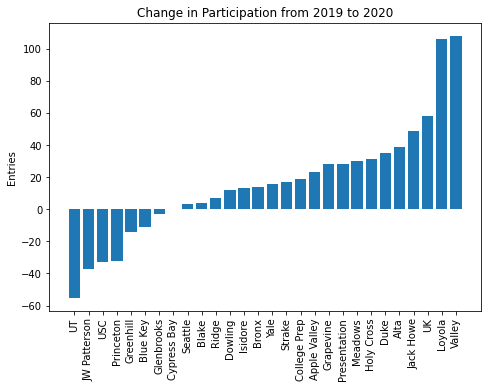

In [473]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([changeName[d[0]] if d[0] in changeName else d[0].title() for d in changeData], [d[1] for d in changeData])
plt.title("Change in Participation from 2019 to 2020")
plt.ylabel("Entries")
plt.xticks(rotation='vertical')
plt.show()

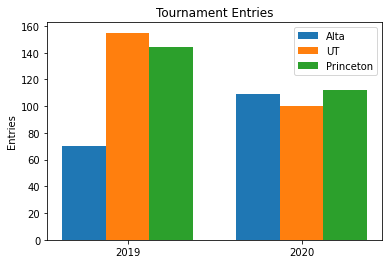

In [486]:
N = 2
alta = (70, 109)
ut = (155, 100)
princeton = (144, 112)

ind = np.arange(N) 
width = 0.25    
plt.bar(ind, alta, width, label='Alta')
plt.bar(ind + width, ut, width,
    label='UT')
plt.bar(ind + 2*width, princeton, width,
    label='Princeton')

plt.ylabel('Entries')
plt.title('Tournament Entries')

plt.xticks(ind + width, ('2019', '2020'))
plt.legend(loc='best')
plt.show()


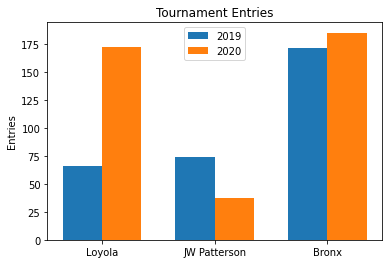

In [493]:
N = 3
data19 = (66, 74, 171)
data20 = (172, 37, 185)

ind = np.arange(N) 
width = 0.35    
plt.bar(ind, data19, width, label='2019')
plt.bar(ind + width, data20, width,
    label='2020')

plt.ylabel('Entries')
plt.title('Tournament Entries')

plt.xticks(ind + width/2, ('Loyola', 'JW Patterson', "Bronx"))
plt.legend(loc='best')
plt.show()

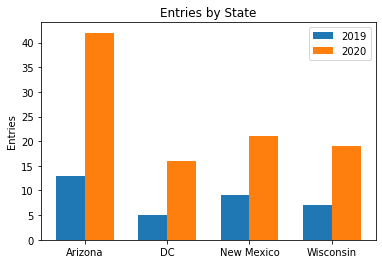

In [510]:
N = 4
data19 = (13, 5, 9, 7)
data20 = (42, 16, 21, 19)

ind = np.arange(N) 
width = 0.35    
plt.bar(ind, data19, width, label='2019')
plt.bar(ind + width, data20, width,
    label='2020')

plt.ylabel('Entries')
plt.title('Entries by State')

plt.xticks(ind + width/2, ('Arizona', 'DC', 'New Mexico', 'Wisconsin'))
plt.legend(loc='best')
plt.show()

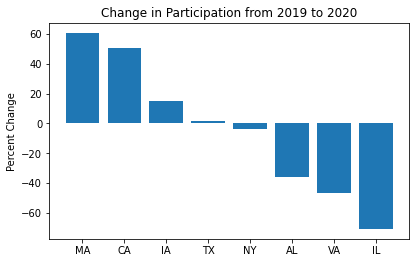

In [505]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0,0,1,1])
labels = ["MA", "CA", "IA", "TX", "NY","AL",  "VA", "IL"]
values = [60.86, 50.68, 15.07, 1.81, -3.72, -35.71, -47.06, -70.91]
ax.bar(labels, values)
plt.title("Change in Participation from 2019 to 2020")
plt.ylabel("Percent Change")
plt.show()

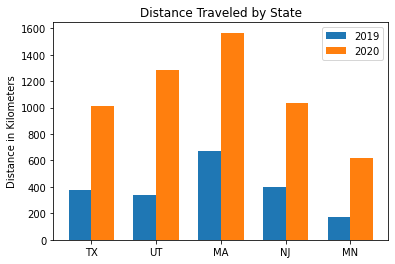

In [512]:
N = 5
data19 = (378, 337, 671, 400, 173)
data20 = (1009, 1287, 1566, 1032, 621)

ind = np.arange(N) 
width = 0.35    
plt.bar(ind, data19, width, label='2019')
plt.bar(ind + width, data20, width,
    label='2020')

plt.ylabel('Distance in Kilometers')
plt.title('Distance Traveled by State')

plt.xticks(ind + width/2, ('TX', 'UT', 'MA', 'NJ', 'MN'))
plt.legend(loc='best')
plt.show()

In [518]:
actData = [[d[0], d[8], d[9]] for d in tournData]
actData.sort(key=lambda x: x[1])

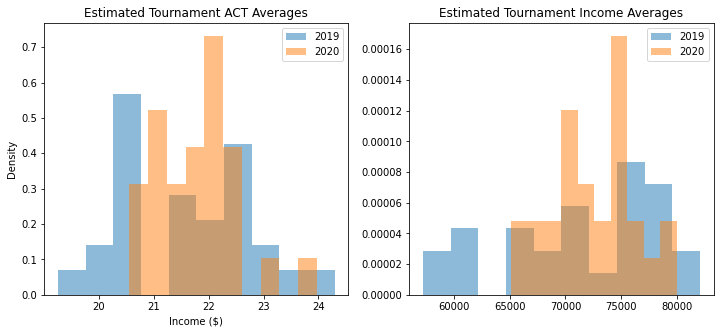

In [535]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.hist([d[8] for d in tournData], alpha=0.5, label='2019', density=True)
ax1.hist([d[9] for d in tournData], alpha=0.5, label='2020', density=True)
#plt.xticks(range(1, 21))
ax1.set(xlabel="ACT Score (0-36)", ylabel="Density")
ax1.set_title("Estimated Tournament ACT Averages")
ax1.legend(loc='upper right')
ax2.hist([d[10] for d in tournData], alpha=0.5, label='2019', density=True)
ax2.hist([d[11] for d in tournData], alpha=0.5, label='2020', density=True)
#plt.xticks(range(1, 21))
ax1.set(xlabel="Income ($)", ylabel="Density")
ax2.set_title("Estimated Tournament Income Averages")
ax2.legend(loc='upper right')

#### Summary Analysis

In [372]:
state_entries19 = dict([[state, 0] for state in states])
state_entries20 = dict([[state, 0] for state in states])
for entry in entries:
    state = getAbbrev(entry['State'])
    if state in states:
        if "19" in entry['Tournament']:
            state_entries19[state] += 1
        else:
            state_entries20[state] += 1

In [373]:
state_entries19

{'AK': 1,
 'AL': 28,
 'AR': 19,
 'AZ': 13,
 'CA': 586,
 'CO': 10,
 'CT': 3,
 'DC': 5,
 'DE': 0,
 'FL': 244,
 'GA': 27,
 'HI': 0,
 'IA': 73,
 'ID': 11,
 'IL': 55,
 'IN': 4,
 'KS': 0,
 'KY': 9,
 'LA': 32,
 'MA': 69,
 'MD': 31,
 'ME': 0,
 'MI': 0,
 'MN': 80,
 'MO': 3,
 'MS': 4,
 'MT': 0,
 'NC': 79,
 'ND': 1,
 'NE': 38,
 'NH': 2,
 'NJ': 131,
 'NM': 9,
 'NV': 8,
 'NY': 215,
 'OH': 25,
 'OK': 13,
 'OR': 13,
 'PA': 53,
 'PR': 0,
 'RI': 3,
 'SC': 0,
 'SD': 10,
 'TN': 0,
 'TX': 553,
 'UT': 34,
 'VA': 34,
 'VT': 0,
 'WA': 58,
 'WI': 7,
 'WV': 0,
 'WY': 1}

In [374]:
state_entries20

{'AK': 4,
 'AL': 18,
 'AR': 16,
 'AZ': 42,
 'CA': 883,
 'CO': 12,
 'CT': 2,
 'DC': 16,
 'DE': 0,
 'FL': 232,
 'GA': 33,
 'HI': 0,
 'IA': 84,
 'ID': 14,
 'IL': 16,
 'IN': 1,
 'KS': 0,
 'KY': 2,
 'LA': 24,
 'MA': 111,
 'MD': 27,
 'ME': 22,
 'MI': 8,
 'MN': 101,
 'MO': 3,
 'MS': 5,
 'MT': 0,
 'NC': 86,
 'ND': 2,
 'NE': 26,
 'NH': 11,
 'NJ': 131,
 'NM': 21,
 'NV': 14,
 'NY': 207,
 'OH': 28,
 'OK': 16,
 'OR': 27,
 'PA': 76,
 'PR': 0,
 'RI': 0,
 'SC': 5,
 'SD': 12,
 'TN': 0,
 'TX': 563,
 'UT': 41,
 'VA': 18,
 'VT': 0,
 'WA': 66,
 'WI': 19,
 'WV': 7,
 'WY': 2}

In [375]:
state_distance19 = dict([[state, 0] for state in states])
state_distance20 = dict([[state, 0] for state in states])
for entry in entries:
    state = getAbbrev(entry['State'])
    host = getAbbrev(tournInfo[entry['Tournament'][:-2] + "19"]['State'])
    if host in abbrevOf:
        host = abbrevOf[host]
    if state in states:
        if "19" in entry['Tournament']:
            state_distance19[state] += distance(location[state], location[host])
        else:
            state_distance20[state] += distance(location[state], location[host])

In [376]:
for state in states:
    if state_entries19[state] > 0:
        state_distance19[state] /= state_entries19[state]
    if state_entries20[state] > 0:
        state_distance20[state] /= state_entries20[state]

In [377]:
state_distance19

{'AK': 3794.66588684453,
 'AL': 843.4358902131935,
 'AR': 713.0352579788396,
 'AZ': 1184.7606172104136,
 'CA': 533.6823976235497,
 'CO': 861.4520827641987,
 'CT': 204.45602935828614,
 'DC': 391.4223285519889,
 'DE': 0,
 'FL': 964.0162362882822,
 'GA': 977.6779293559711,
 'HI': 0,
 'IA': 615.6505451427819,
 'ID': 609.370961010137,
 'IL': 731.7701388479817,
 'IN': 320.641179270537,
 'KS': 0,
 'KY': 145.09943175566664,
 'LA': 384.50631218909774,
 'MA': 671.2707434492746,
 'MD': 633.3209276233388,
 'ME': 0,
 'MI': 0,
 'MN': 173.079424944642,
 'MO': 448.3624287699663,
 'MS': 779.4151745256167,
 'MT': 0,
 'NC': 553.8679149575088,
 'ND': 486.23802564677806,
 'NE': 613.5624434209376,
 'NH': 318.4600583818212,
 'NJ': 400.16501968725015,
 'NM': 1483.0708035044254,
 'NV': 707.6796017006609,
 'NY': 635.3916638994093,
 'OH': 648.2205561513574,
 'OK': 464.6001924151335,
 'OR': 1511.4538808859738,
 'PA': 660.0275543500047,
 'PR': 0,
 'RI': 1899.20240903386,
 'SC': 0,
 'SD': 564.3798201170046,
 'TN': 

In [378]:
state_distance20

{'AK': 4377.352947270115,
 'AL': 1047.8775747879213,
 'AR': 850.4899791650996,
 'AZ': 2300.939499810653,
 'CA': 1134.965874078278,
 'CO': 1609.3892172152616,
 'CT': 204.45602935828612,
 'DC': 919.3526356807411,
 'DE': 0,
 'FL': 1257.5372702548402,
 'GA': 1392.5781947523067,
 'HI': 0,
 'IA': 1019.368497196353,
 'ID': 1191.6141440189108,
 'IL': 945.3619234549669,
 'IN': 1054.5507512471568,
 'KS': 0,
 'KY': 0.0,
 'LA': 843.6861297296847,
 'MA': 1565.7097435669937,
 'MD': 1146.8170321042749,
 'ME': 3457.8945502025035,
 'MI': 1361.5308285381825,
 'MN': 621.4403775454265,
 'MO': 719.6220490673442,
 'MS': 548.1909412643837,
 'MT': 0,
 'NC': 727.4712201651274,
 'ND': 486.23802564677806,
 'NE': 643.9419575715933,
 'NH': 2988.0368941969264,
 'NJ': 1032.1719710615807,
 'NM': 1398.4550325011646,
 'NV': 1404.8198909271773,
 'NY': 1166.1538729489573,
 'OH': 642.6506506562428,
 'OK': 653.5821674521171,
 'OR': 1831.6221019427544,
 'PA': 1035.3740975407463,
 'PR': 0,
 'RI': 0,
 'SC': 797.0851807294109,

In [379]:
with open(OUTFILE2, 'w') as outFile:
    outWriter = csv.writer(outFile, lineterminator = '\n')
    outWriter.writerow(["State",
                      "Entries19",
                      "Entries20",
                      "Distance19",
                      "Distance20"])
    for state in states:
        outWriter.writerow([state,
                           state_entries19[state],
                           state_entries20[state],
                           state_distance19[state],
                           state_distance20[state]])

#### Lone Wolves

In [537]:
entries19 = [e for e in entries if e['Tournament'][-2:] == '19']
entries20 = [e for e in entries if e['Tournament'][-2:] == '20']

In [538]:
teammembers19 = {}
for entry in entries19:
    if not entry['School'] in teammembers19:
        teammembers19[entry['School']] = set()
    teammembers19[entry['School']].add(entry['Name'])

In [539]:
teammembers20 = {}
for entry in entries20:
    if not entry['School'] in teammembers20:
        teammembers20[entry['School']] = set()
    teammembers20[entry['School']].add(entry['Name'])

In [541]:
sum([len(t) for t in teammembers19.values()])/len(teammembers19)

2.9635974304068524

In [542]:
sum([len(t) for t in teammembers20.values()])/len(teammembers20)

2.7898383371824482

In [423]:
schoolNew = {}
schoolAll = {}
loneWolves = {}
LW19 = 0
LW20 = 0
sizes19 = []
sizes20 = []
for i in range(len(tourn_list)//2):
    tourn19 = tourn_list[2*i]
    tourn20 = tourn_list[2*i+1]
    entries19 = entries_by_tourn[tourn19]
    entries20 = entries_by_tourn[tourn20]
    oldSchools = [entry['School'] for entry in entries19]
    schoolSizes = {}
    for entry in entries19:
        school = entry['School']
        if school in schoolSizes:
            schoolSizes[school] += 1
        else:
            schoolSizes[school] = 1
    print(tourn19)
    print(sum(schoolSizes.values())/len(schoolSizes))
    sizes19 += list(schoolSizes.values())
    for school in schoolSizes:
        if schoolSizes[school] == 1:
            LW19 += 1
    
    schoolSizes = {}
    for entry in entries20:
        school = entry['School']
        
        if school in schoolSizes:
            schoolSizes[school] += 1
        else:
            schoolSizes[school] = 1
        
        if school in schoolAll:
            schoolAll[school] += 1
        else:
            schoolAll[school] = 1
        
        if school not in oldSchools:
            if school in schoolNew:
                schoolNew[school] += 1
            else:
                schoolNew[school] = 1
        
    print(tourn20)
    print(sum(schoolSizes.values())/len(schoolSizes))
    for school in schoolSizes:
        if schoolSizes[school] == 1:
            LW20 += 1
    sizes20 += list(schoolSizes.values())

UT19
2.767857142857143
UT20
2.5641025641025643
alta19
2.0
alta20
1.912280701754386
applevalley19
2.380952380952381
applevalley20
2.3066666666666666
blake19
2.5714285714285716
blake20
2.8
bluekey19
2.607843137254902
bluekey20
1.876923076923077
bronx19
2.7580645161290325
bronx20
2.1264367816091956
collegeprep19
2.763157894736842
collegeprep20
2.2962962962962963
cypress19
2.5714285714285716
cypress20
1.7142857142857142
dowling19
2.3
dowling20
2.0
duke19
2.4166666666666665
duke20
1.9787234042553192
glenbrooks19
2.033333333333333
glenbrooks20
2.4657534246575343
grapevine19
2.207547169811321
grapevine20
1.9594594594594594
greenhill19
2.169811320754717
greenhill20
1.7719298245614035
heritage19
1.8974358974358974
heritage20
1.6818181818181819
holycross19
1.9473684210526316
holycross20
1.8888888888888888
isidore19
1.9230769230769231
isidore20
2.0
jackhowe19
2.638888888888889
jackhowe20
2.2153846153846155
loyola19
2.0
loyola20
2.263157894736842
meadows19
2.05
meadows20
2.21875
presentation19
2.7

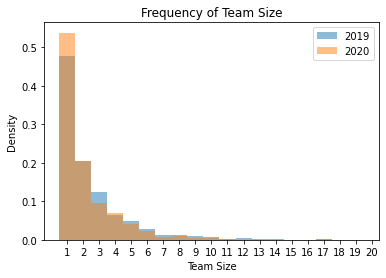

In [536]:
plt.hist(sizes19, bins=[x-0.5 for x in range(1, 21)], alpha=0.5, label='2019', density=True)
plt.hist(sizes20, bins=[x-0.5 for x in range(1, 21)], alpha=0.5, label='2020', density=True)
plt.xticks(range(1, 21))
plt.xlabel("Team Size")
plt.ylabel("Density")
plt.title("Frequency of Team Size")
plt.legend(loc='upper right')

In [397]:
LW19/2599

0.19892266256252406

In [398]:
LW20/3054

0.25311067452521285

In [382]:
new = 0
for school in schoolNew:
    print(school)
    ratio = schoolNew[school] / schoolAll[school]
    print(schoolNew[school])
    print(ratio)
    if ratio == 1:
        new += 1

Centennial HS
3
1.0
Claudia Taylor Johnson High School
9
1.0
Fremont High School
9
1.0
Harlingen HS South
1
1.0
Heights High School
6
1.0
J. Frank Dobie High School
1
1.0
Jack C. Hays
2
1.0
L C Anderson High School
20
1.0
Lake Travis High School
3
1.0
Legacy Christian Academy
3
0.375
Little Rock Central
4
0.4444444444444444
Los Alamos High School
1
1.0
Louis D. Brandeis
1
1.0
McMillen High School
3
1.0
McNeil High School
13
1.0
Memorial High School
6
1.0
Norman North High School
7
1.0
Northland Christian School
3
0.375
Northview High School
15
0.75
Plano East Sr. High
4
1.0
Plano West Sr High School
17
1.0
Reagan HS
3
1.0
Texas City High School
2
1.0
The Quarry Lane School
7
0.7
The Village High School
3
1.0
The Woodlands High School
9
1.0
Unionville
15
0.6818181818181818
Westwood
27
1.0
Wylie Sr High School
1
1.0
Albuquerque Academy
13
0.7647058823529411
BASIS Independent Silicon Valley In
9
1.0
Bishop's
12
1.0
Blackfoot High School
1
1.0
Brentwood School
7
0.28
Cardinal Gibbons HS In

In [383]:
schoolNew

{'Centennial HS': 3,
 'Claudia Taylor Johnson High School': 9,
 'Fremont High School': 9,
 'Harlingen HS South': 1,
 'Heights High School': 6,
 'J. Frank Dobie High School': 1,
 'Jack C. Hays': 2,
 'L C Anderson High School': 20,
 'Lake Travis High School': 3,
 'Legacy Christian Academy': 3,
 'Little Rock Central': 4,
 'Los Alamos High School': 1,
 'Louis D. Brandeis': 1,
 'McMillen High School': 3,
 'McNeil High School': 13,
 'Memorial High School': 6,
 'Norman North High School': 7,
 'Northland Christian School': 3,
 'Northview High School': 15,
 'Plano East Sr. High': 4,
 'Plano West Sr High School': 17,
 'Reagan HS': 3,
 'Texas City High School': 2,
 'The Quarry Lane School': 7,
 'The Village High School': 3,
 'The Woodlands High School': 9,
 'Unionville': 15,
 'Westwood': 27,
 'Wylie Sr High School': 1,
 'Albuquerque Academy': 13,
 'BASIS Independent Silicon Valley In': 9,
 "Bishop's": 12,
 'Blackfoot High School': 1,
 'Brentwood School': 7,
 'Cardinal Gibbons HS Independent': 2,


In [384]:
new

310

In [385]:
len(schoolAll)

433

[OrderedDict([('Tournament', 'applevalley19'),
              ('Event', 'LD'),
              ('School', 'DuPont Manual High School'),
              ('State', 'KY/US'),
              ('Name', 'Pranav Kanmadikar'),
              ('Code', 'DuPont Manual PK'),
              ('Status', 'In')]),
 OrderedDict([('Tournament', 'uk19'),
              ('Event', 'LD'),
              ('School', 'DuPont Manual High School'),
              ('State', 'KY/US'),
              ('Name', 'Arthi Sundar'),
              ('Code', 'DuPont Manual AS'),
              ('Status', 'In')]),
 OrderedDict([('Tournament', 'uk19'),
              ('Event', 'LD'),
              ('School', 'DuPont Manual High School'),
              ('State', 'KY/US'),
              ('Name', 'Liam Buchanan'),
              ('Code', 'DuPont Manual LB'),
              ('Status', 'In')]),
 OrderedDict([('Tournament', 'uk19'),
              ('Event', 'LD'),
              ('School', 'DuPont Manual High School'),
              ('State', 'KY/US'),